# 

- **Answer Set** : NO. 05
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 610301060

## Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

import sklearn.metrics
import sklearn.preprocessing
import sklearn.linear_model

## 1.

The goal is to cluster a dataset.

### a.

**Question:** Preparing the dataset.

Load the dataset:

In [3]:
data = pd.read_csv('1.csv')
data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Preprocess the dataset:

In [4]:
data['Private'] = pd.get_dummies(data['Private']).drop('No', axis = 1)

columns_list = data.columns.drop('Private')
numerical_data = np.array(data[columns_list])
n = sklearn.preprocessing.normalize(numerical_data, norm='l2', axis=0)

i = 0
for col in columns_list:
    data[col] = n[:, i]
    i = i + 1

Final dataset:

In [6]:
data

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,0.012164,0.013924,0.021329,0.025222,0.031510,0.016973,0.011038,0.023857,0.026348,0.028143,0.052556,0.033721,0.034525,0.044370,0.016624,0.023006,0.031805
1,1,0.016018,0.021745,0.015146,0.017545,0.017573,0.015784,0.025220,0.039376,0.051498,0.046905,0.035834,0.013970,0.013279,0.029907,0.022165,0.034396,0.029685
2,1,0.010464,0.012398,0.009940,0.024125,0.030298,0.006095,0.002035,0.036074,0.029941,0.025016,0.027831,0.025532,0.029214,0.031623,0.041559,0.028541,0.028625
3,1,0.003056,0.003944,0.004053,0.065796,0.053931,0.003000,0.001295,0.041557,0.043514,0.028143,0.020903,0.044320,0.042935,0.018876,0.051256,0.062133,0.031275
4,1,0.001414,0.001650,0.001627,0.017545,0.026662,0.001465,0.017862,0.024241,0.032895,0.050033,0.035834,0.036612,0.031869,0.029172,0.002771,0.035687,0.007951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,0.016099,0.017122,0.016063,0.004386,0.015755,0.018173,0.041704,0.021795,0.031138,0.031270,0.028667,0.028904,0.026558,0.051479,0.019394,0.014602,0.021204
773,1,0.014355,0.020400,0.020560,0.026318,0.028480,0.016761,0.022753,0.036939,0.039601,0.037524,0.029861,0.035167,0.033197,0.032603,0.042944,0.030024,0.043998
774,1,0.015366,0.021643,0.020560,0.037284,0.036964,0.016431,0.003412,0.022125,0.033534,0.038588,0.018657,0.032276,0.033197,0.035300,0.027706,0.027195,0.025974
775,1,0.078442,0.027723,0.038961,0.104176,0.059990,0.030692,0.001706,0.063618,0.051977,0.039401,0.050526,0.046247,0.042492,0.014218,0.067880,0.131958,0.052479


### b.

**Question:** Use KMeans algorithm for clustering the data. Number of cluster should vary between 2 and 30. Then determine the best number of clusters. 

Compute the inertia criteria for each number of clusters:

In [8]:
data_array = np.array(data)
inertia_list = []
for k in np.arange(2, 31):
    model = KMeans(n_clusters = k)
    model.fit(data_array)
    inertia_list.append(model.inertia_)

Plot the inertia - number of cluster curve:

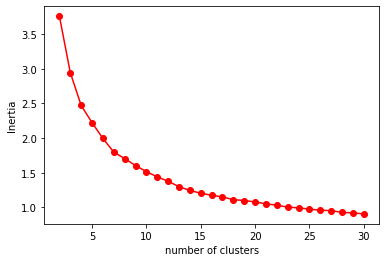

In [9]:
plt.plot(np.arange(2,31),inertia_list,'ro-')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

The model with 6 clusters is the best model.

### c.

**Question:** Use PCA for dimentionality reduction into 2 dimention and then, use the previous model for clustering and visualizing them.

implement the KMeans with 6 clusters:

In [10]:
kmn = KMeans(n_clusters = 6)
kmn.fit(data_array)


centroids = kmn.cluster_centers_
labels = kmn.predict(data_array)

Use PCA for dimention reduction:

In [11]:
pca = PCA(n_components = 2)
pca.fit(data_array)

xy_data = pca.transform(data_array)

Plot the clusters after dimentionality reduction:

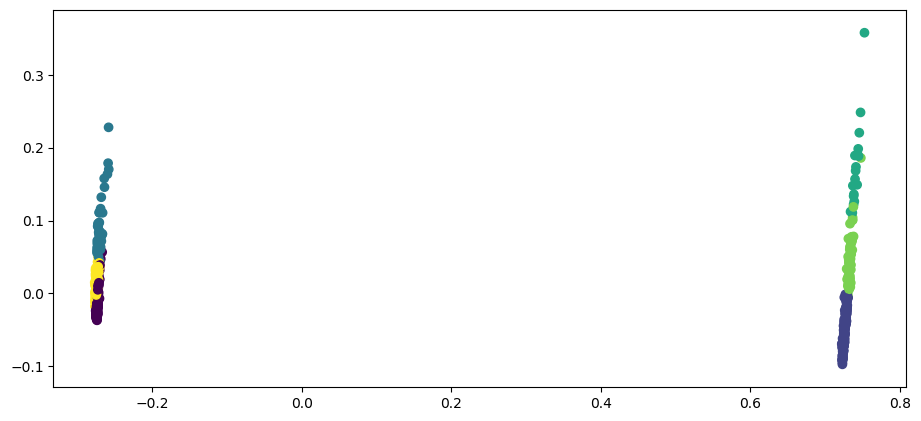

In [12]:
plt.figure(figsize = (11, 5), dpi = 100)
plt.scatter(xy_data[:, 0], xy_data[:, 1], c=labels)
plt.show()

In [19]:
abc = []
for i in np.arange(0,len(labels)):
    if labels[i] in [0, 2, 5]:
        abc.append(i)

efg = []
for i in np.arange(0,len(labels)):
    if labels[i] in [1, 3, 4]:
        efg.append(i)

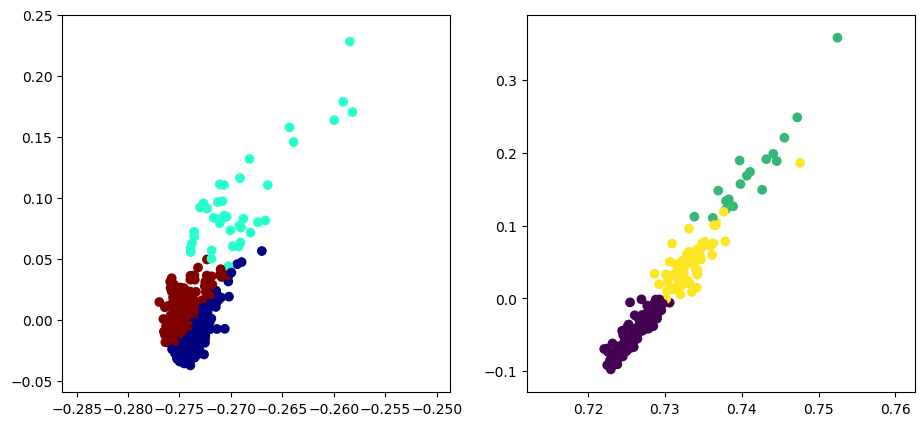

In [20]:
plt.figure(figsize = (11, 5), dpi = 100)
plt.subplot(1, 2, 1)
plt.scatter(xy_data[abc][:, 0], xy_data[abc][:, 1], c=labels[abc], cmap='jet')

plt.subplot(1, 2, 2)
plt.scatter(xy_data[efg][:, 0], xy_data[efg][:, 1], c=labels[efg])

plt.show()

## 2.

The purpose of the question is to classify the image of numbers 0 to 9 with semi-supervised technique.

### a.

**Question:** Preprocess the dataset.

Load the datasets:

In [39]:
train_set = pd.read_csv('2_train_set.csv')
test_set  = pd.read_csv('2_test_set.csv')
unlabeled = pd.read_csv('2_unlabeled.csv')

In [40]:
x_train = np.array(train_set.drop('target', axis = 1, inplace = False))
x_test  = np.array(test_set.drop('target', axis = 1, inplace = False))
x_unlabeled = np.array(unlabeled)

y_train = np.array(train_set['target'])
y_test  = np.array(test_set['target'])

Normalize the datasets:

In [41]:
x_train = sklearn.preprocessing.normalize(x_train, norm='l2', axis=0)
x_test  = sklearn.preprocessing.normalize(x_test, norm='l2', axis=0)
x_unlabeled = sklearn.preprocessing.normalize(x_unlabeled, norm='l2', axis=0)

Plot some of the pictures of dataset:

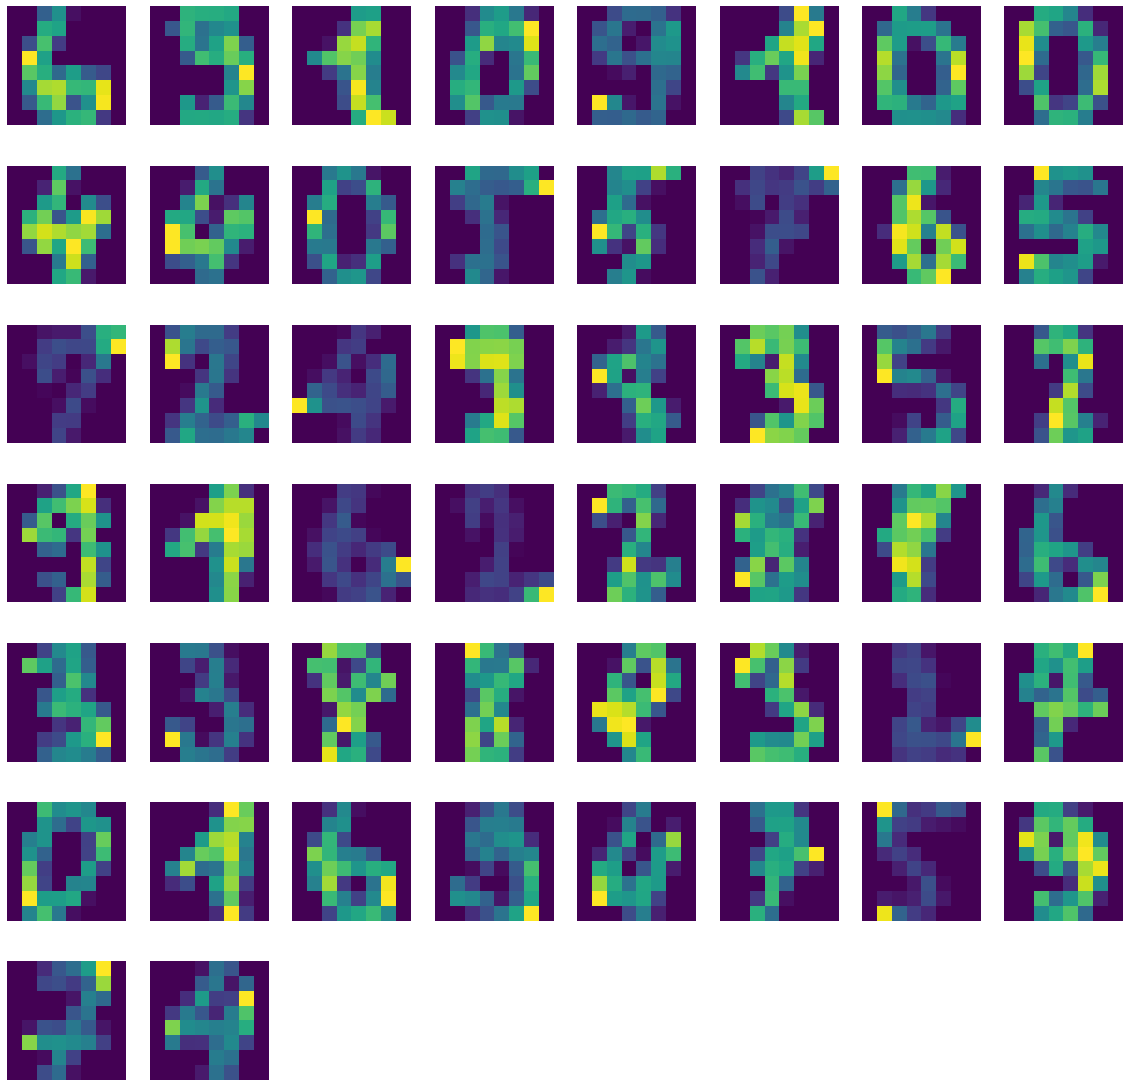

In [42]:
plt.figure(figsize = (20, 20))

for i in range(0, 50):
    plt.subplot(7, 8, i + 1)
    plt.imshow(x_train[i].reshape(8, 8))
    plt.axis('off')

plt.show()


### b.

**Question:** Train a Logistic Regression on train set.

Fit the Logistic Regression on train set:

In [44]:
logistic_regression_model_1 = sklearn.linear_model.SGDClassifier(loss = 'log')
logistic_regression_model_1.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Test accuracy of the model:

In [45]:
acc = sklearn.metrics.accuracy_score(logistic_regression_model_1.predict(x_test), y_test)
acc

0.7351851851851852

### c.

**Question:** Train a KMeans with 40 clusters on unlabeled dataset.

KMeans model witth number of clusters = 40:

In [46]:
kmn_model_1 = KMeans(n_clusters = 40)
kmn_model_1.fit(x_unlabeled)

labels_x_unlabeled = kmn_model_1.predict(x_unlabeled)
centroids_1 = kmn_model_1.cluster_centers_

### d.

**Question:** Use PCA for dimentionality reduction of unlabeled dataset and plot the result.

Fit PCA model on unlabeled data:

In [47]:
pca_model = PCA(n_components = 2)
pca_model.fit(x_unlabeled)
xy_x_unlabeled = pca_model.transform(x_unlabeled)

Plot the clusters:

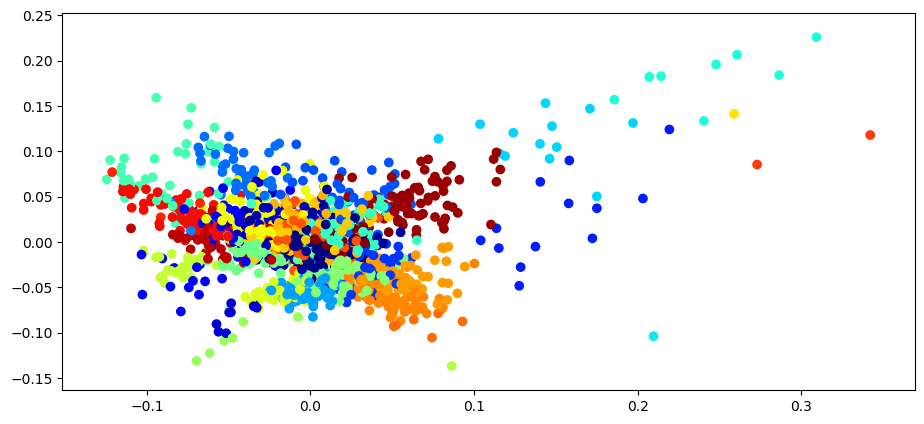

In [48]:
plt.figure(figsize = (11, 5), dpi = 100)
plt.scatter(xy_x_unlabeled[:, 0], xy_x_unlabeled[:, 1], c=labels_x_unlabeled, cmap = 'jet')
plt.show()

### e.

**Question:** Determine the class of each unlabeled image according to the class of center of each clusters.

Plot the center of each cluster:

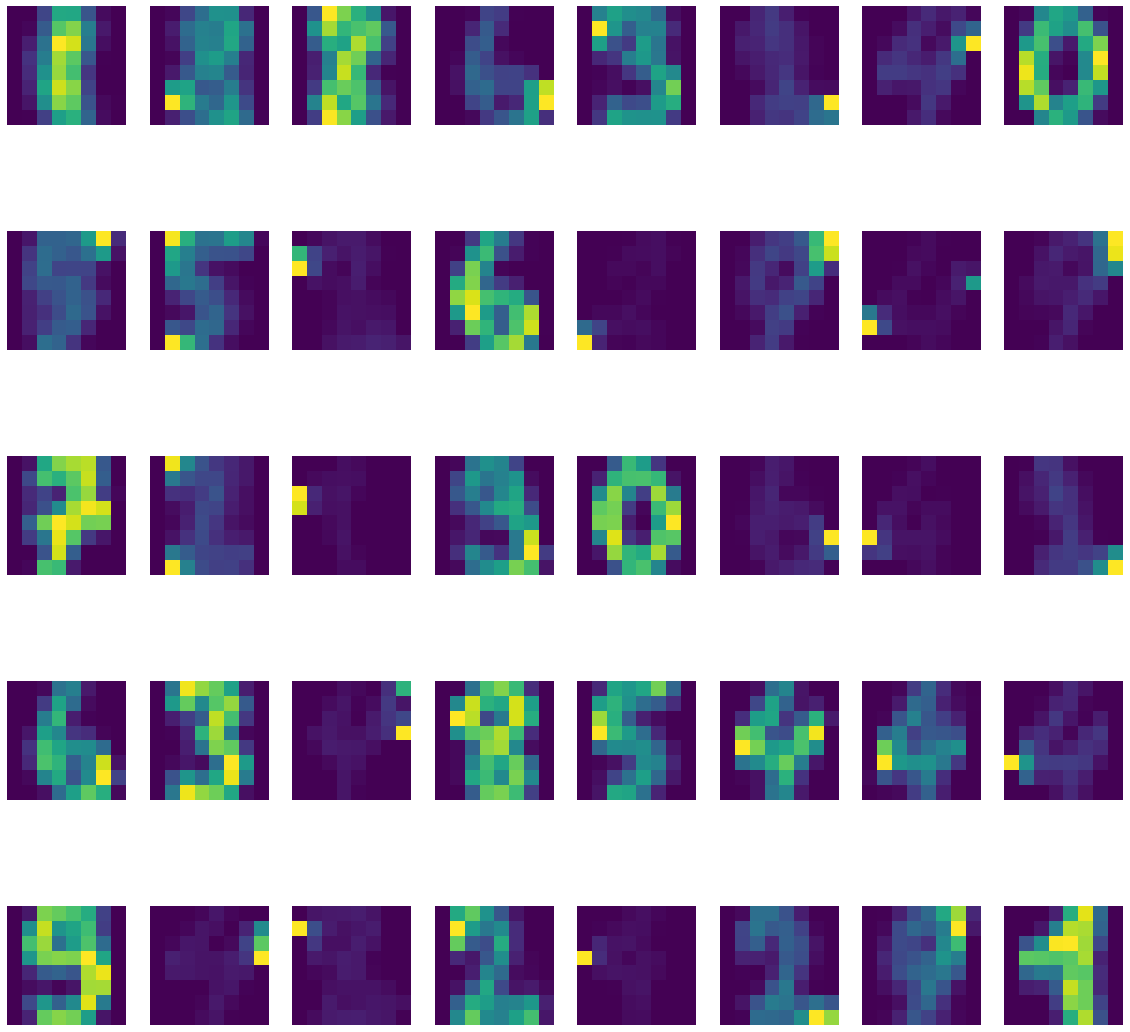

In [49]:
plt.figure(figsize = (20, 20))

for i in range(0, 40):
    plt.subplot(5, 8, i + 1)
    plt.imshow(centroids_1[i].reshape(8, 8))
    plt.axis('off')

plt.show()

Detemine the nearest point to the center of each cluster:

In [50]:
cluster_index_set = []
for j in range(0, 40):
    c = []
    c = np.array([i for i in range(0, len(labels_x_unlabeled)) if labels_x_unlabeled[i] == j])
    cluster_index_set.append(c)
    
nearest_point_index = []
for i in range(0, 40):
    k = cluster_index_set[i][kmn_model_1.transform(x_unlabeled[cluster_index_set[i]])[:, i].argmin()]
    nearest_point_index.append(k)

Plot the nearest point to the center of each cluster:

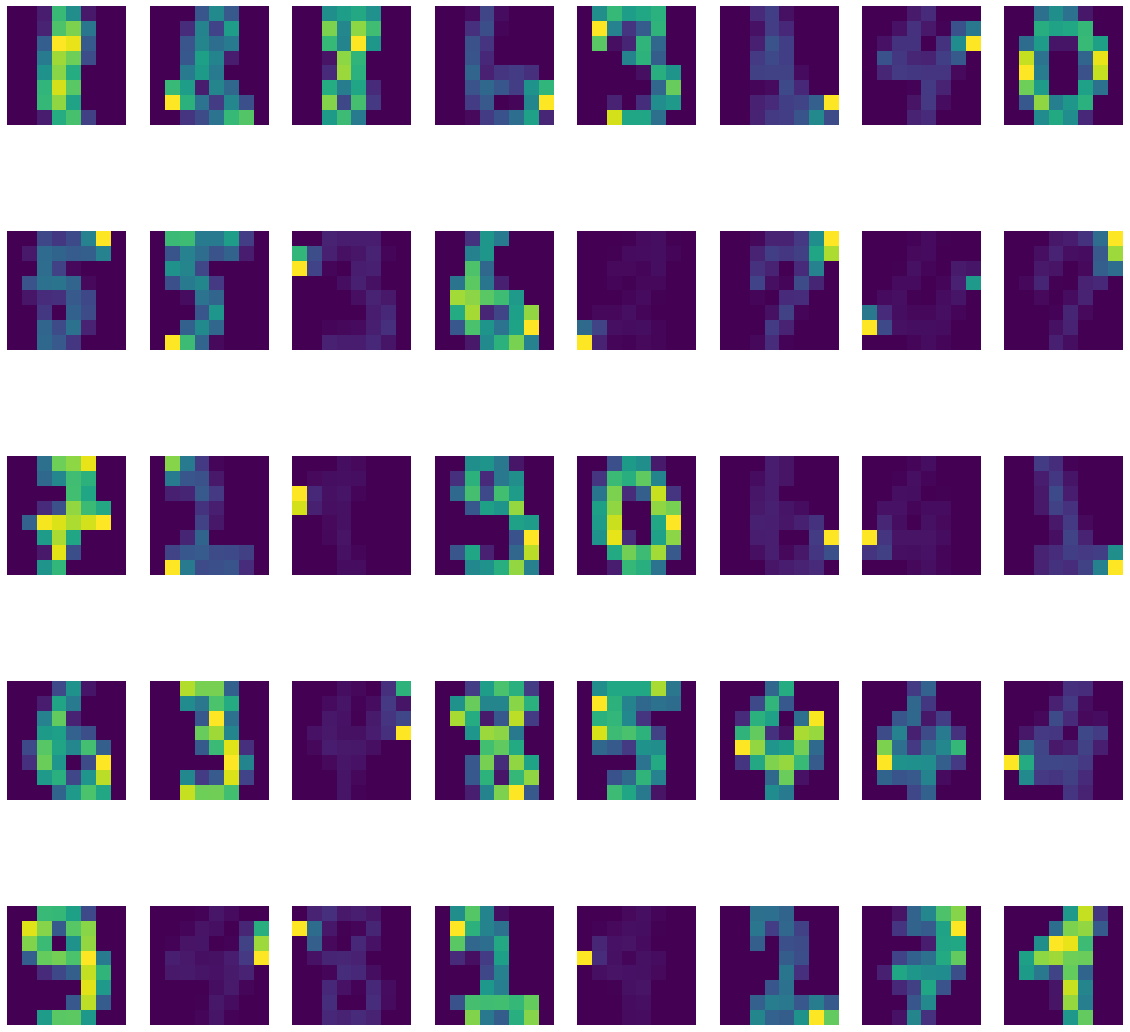

In [51]:
plt.figure(figsize = (20, 20))

for i in range(0, 40):
    plt.subplot(5, 8, i + 1)
    plt.imshow(x_unlabeled[nearest_point_index[i]].reshape(8, 8))
    plt.axis('off')

plt.show()

Label each cluster according to the nearest point to the center of each cluster:

In [54]:
labels_x_unlabeled

array([29, 11, 11, ...,  9, 21,  1], dtype=int32)

In [102]:
new_labels = [1, 8, 2, 6, 3, 2, 4, 0, 5, 5,\
              3, 6, 2, 7, 0, 9, 7, 2, 1, 3,\
              0, 6, 0, 1, 6, 3, 4, 8, 5, 4,\
              4, 4, 9, 4, 8, 2, 4, 2, 7, 1]

In [103]:
y_unlabeled = labels_x_unlabeled
for i in range(0, 40):
    y_unlabeled[cluster_index_set[i]] = new_labels[i]

### f.

**Question:** Train Logistic Regression model with train data and the dataset which create in the previous section.

Fit a Logistic Regression model:

In [104]:
logistic_regression_model_2 = sklearn.linear_model.SGDClassifier(loss = 'log')
logistic_regression_model_2.fit(x_unlabeled, y_unlabeled)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Test accuracy:

In [105]:
sklearn.metrics.accuracy_score(linear_regression_model_2.predict(x_test), y_test)

0.7592592592592593